# **Online Retail Transactions Analysis**

## Objectives

* This notebook analyzes online retail transaction data to understand customer behavior, identify popular products, and optimize business strategies. The analysis provides actionable insights for improving sales, marketing effectiveness, and customer retention.

## Inputs

* online_retail_sales.csv
* online_retail_returns.csv

## Outputs

* Business Performance Analysis 
* Customer Insights Analysis
* Product Performance Analysis
* Seasonal Patterns Analysis



We need to Load the data from the processed data sets reside within data directory

In [21]:
import os
import pandas as pd

# Data directory paths
data_path = os.path.join("..", "data")

df_clean = pd.read_csv(os.path.join(data_path, "online_retail_clean.csv"))
print(f"Original dataset shape: {df_clean.shape}")

df_sales = pd.read_csv(os.path.join(data_path, "online_retail_sales.csv"))
print(f"Original dataset shape: {df_sales.shape}")

df_returns = pd.read_csv(os.path.join(data_path, "online_retail_returns.csv"))
print(f"Original dataset shape: {df_returns.shape}")

Original dataset shape: (536637, 14)
Original dataset shape: (526052, 14)
Original dataset shape: (9249, 14)


C:\Users\Hp 2022\AppData\Local\Temp\ipykernel_760\1060994532.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(os.path.join(data_path, "online_retail_sales.csv"))


In [ ]:
print("=== SET DATA TYPES ===")

#Set Data Types - df_clean
df_clean['InvoiceNo'] = df_sales['StockCode'].astype('string')
df_clean['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
df_clean['StockCode'] = df_sales['StockCode'].astype('string')
df_clean['Description'] = df_sales['Description'].astype('string')
df_clean['Country'] = df_sales['Country'].astype('category')

#Set Data Types - df_sales
df_sales['InvoiceNo'] = df_sales['StockCode'].astype('string')
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
df_sales['StockCode'] = df_sales['StockCode'].astype('string')
df_sales['Description'] = df_sales['Description'].astype('string')
df_sales['Country'] = df_sales['Country'].astype('category')

#Set Data Types - df_return
df_returns['InvoiceNo'] = df_sales['StockCode'].astype('string')
df_returns['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
df_returns['StockCode'] = df_sales['StockCode'].astype('string')
df_returns['Description'] = df_sales['Description'].astype('string')
df_returns['Country'] = df_sales['Country'].astype('category')

# print("===================")
# print(df_clean.info())
# print(df_sales.info())
# print(df_returns.info())

=== SET DATA TYPES ===


We need to perform Business Performance Analysis with descriptive statistcis

In [9]:
print("=== DESCRIPTIVE STATISTICS ===")
    
# Calculate key metrics
total_sales_revenue = df_sales['Revenue'].sum()
total_returns_value = abs(df_returns['Revenue'].sum())
net_revenue = total_sales_revenue - total_returns_value
avg_transaction_value = df_sales['Revenue'].mean()
return_rate = (total_returns_value / total_sales_revenue) * 100

# Display statistics
print(f"Analysis Period: {df_clean['InvoiceDate'].min().date()} to {df_clean['InvoiceDate'].max().date()}")
print(f"Gross Sales Revenue: £{total_sales_revenue:,.2f}")
print(f"Total Returns Value: £{total_returns_value:,.2f}")
print(f"Net Revenue: £{net_revenue:,.2f}")
print(f"Return Rate: {return_rate:.1f}%")
print(f"Average Transaction Value: £{avg_transaction_value:.2f}")
print(f"Total Transactions: {len(df_clean):,}")
print(f"Sales Transactions: {len(df_sales):,}")
print(f"Return Transactions: {len(df_returns):,}")
print(f"Unique Customers: {df_clean['CustomerID'].nunique():,}")
print(f"Unique Products: {df_clean['StockCode'].nunique():,}")
print(f"Countries: {df_clean['Country'].nunique()}")

=== DESCRIPTIVE STATISTICS ===
Analysis Period: 2010-12-01 to 2011-12-09
Gross Sales Revenue: £10,374,333.48
Total Returns Value: £648,326.53
Net Revenue: £9,726,006.95
Return Rate: 6.2%
Average Transaction Value: £19.72
Total Transactions: 536,637
Sales Transactions: 526,052
Return Transactions: 9,249
Unique Customers: 4,371
Unique Products: 3,940
Countries: 38


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Transaction type distribution
corr = df_sales[['Quantity', 'Revenue']].corr()
im = axes[0].imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im, ax=axes[0]) 
axes[0].set_xticks(np.arange(len(corr.columns)))
axes[0].set_yticks(np.arange(len(corr.columns)))
axes[0].set_xticklabels(corr.columns)
axes[0].set_yticklabels(corr.columns)

# Revenue by country (top 10)
country_revenue = df_sales.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
axes[1].bar(range(len(country_revenue)), country_revenue.values)
axes[1].set_title('Top 10 Countries by Revenue')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Revenue (£)')
axes[1].set_xticks(range(len(country_revenue)))
axes[1].set_xticklabels(country_revenue.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

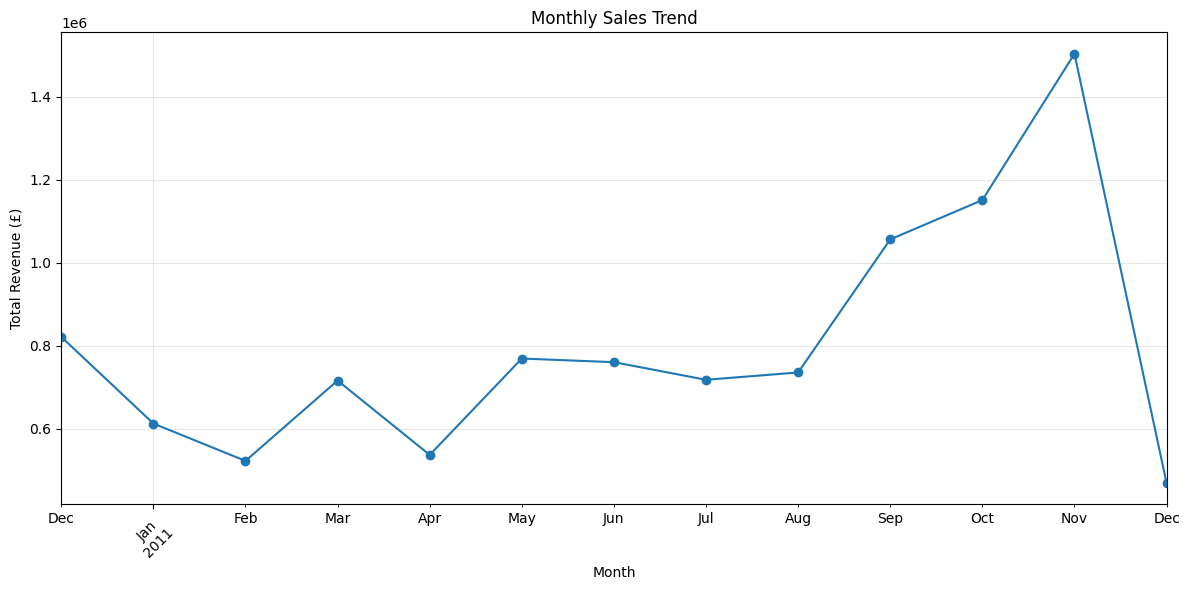

(7,)
Weekday
Monday       1775782.071
Tuesday      2098516.911
Wednesday    1847074.380
Thursday     2199292.570
Friday       1646876.771
Name: Revenue, dtype: float64


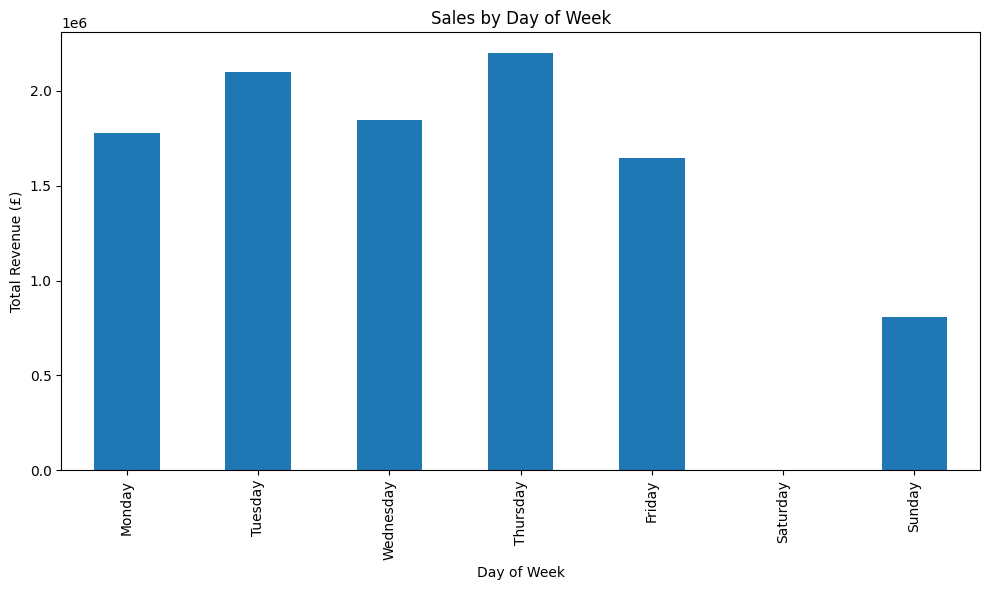

In [24]:
# Monthly sales trend
monthly_sales = df_sales.groupby([df_sales['InvoiceDate'].dt.to_period('M')])['Revenue'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Daily sales pattern
daily_pattern = df_sales.groupby('Weekday')['Revenue'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pattern = daily_pattern.reindex(days_order)

print(daily_pattern.shape)
print(daily_pattern.head())

plt.figure(figsize=(10, 6))
daily_pattern.plot(kind='bar')
plt.title('Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

In [ ]:
# RFM Analysis

snapshot_date = df_sales['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df_sales.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'Revenue': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency', 
    'Revenue': 'Monetary'
})

# Create RFM segments
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment mapping
segment_map = {
    r'4[4-4][3-4]': 'VIP Customers',
    r'[3-4][3-4][2-4]': 'Loyal Customers', 
    r'[2-3][2-3][2-3]': 'Regular Customers',
    r'[1-2][1-2][1-2]': 'At-Risk Customers',
    r'.*1.*': 'New Customers'
}

rfm['Segment'] = rfm['RFM_Score']
for pattern, segment in segment_map.items():
    rfm['Segment'] = rfm['Segment'].replace(rfm[rfm['RFM_Score'].str.match(pattern)].index, segment)

# Visualize segments
plt.figure(figsize=(10, 6))
segment_counts = rfm['Segment'].value_counts()
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segmentation Distribution')
plt.show()

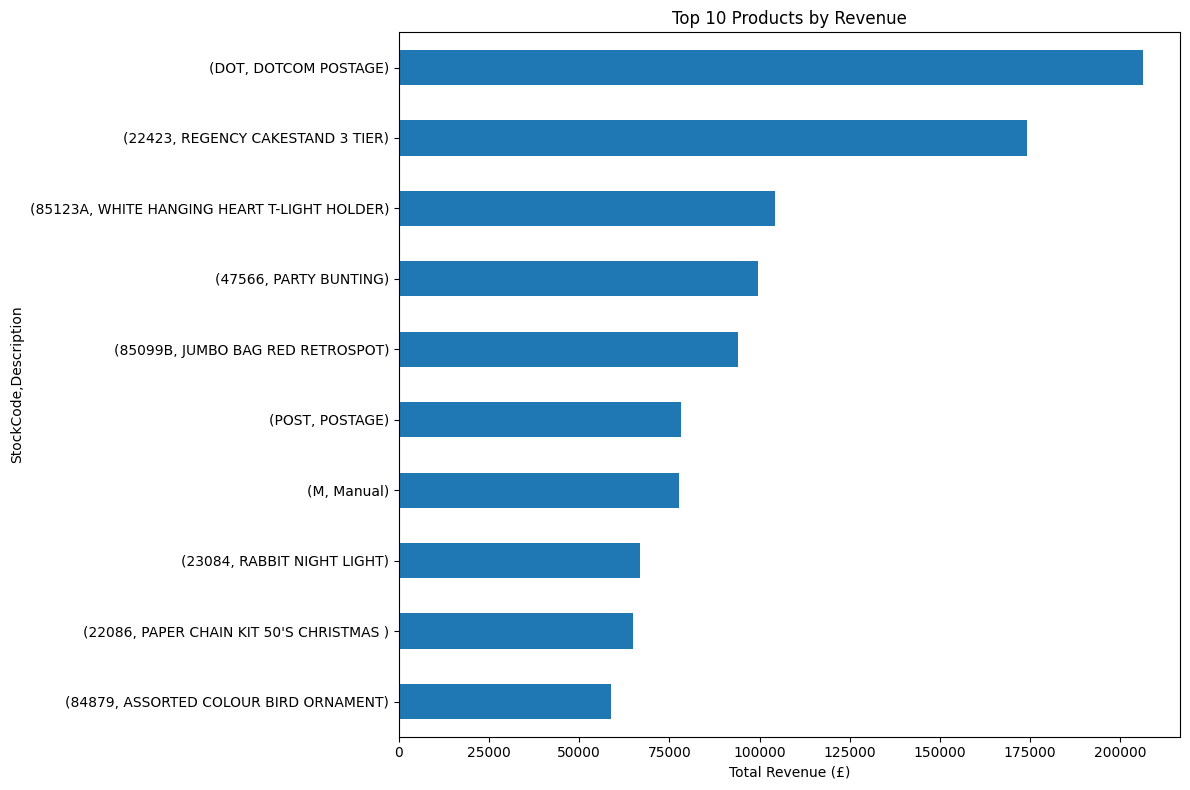

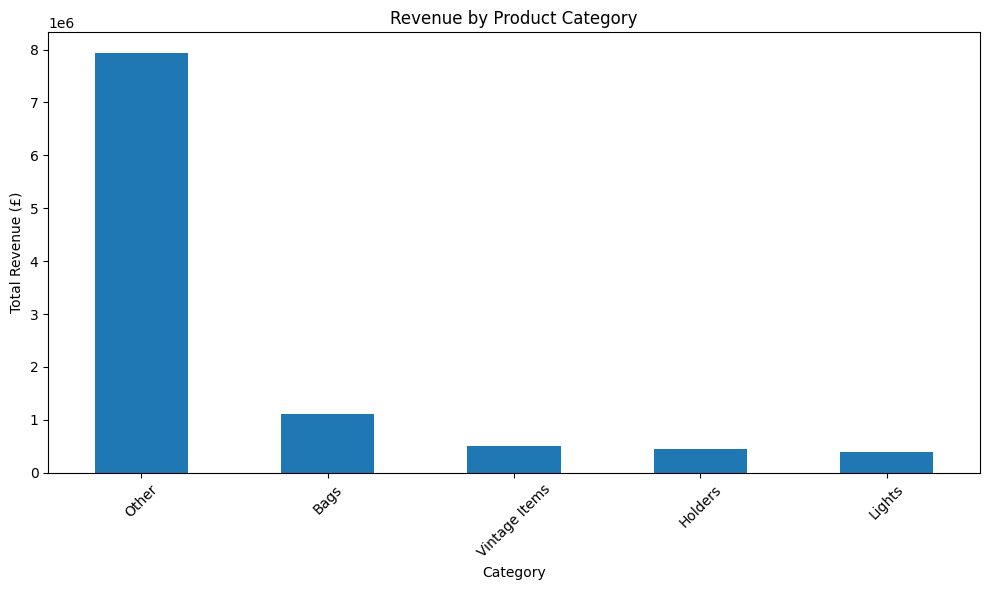

In [19]:
# Top products by revenue
top_products = df_sales.groupby(['StockCode', 'Description']).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'CustomerID': 'nunique'
}).sort_values('Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 8))
top_products['Revenue'].sort_values().plot(kind='barh')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue (£)')
plt.tight_layout()
plt.show()

# Product categories analysis (using description keywords)
def categorize_product(description):
    description = description.lower()
    if 'bag' in description:
        return 'Bags'
    elif 'holder' in description:
        return 'Holders'
    elif 'light' in description:
        return 'Lights'
    elif 'vintage' in description:
        return 'Vintage Items'
    else:
        return 'Other'

df_sales['Category'] = df_sales['Description'].apply(categorize_product)
category_sales = df_sales.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()